# GATHERING

In [1]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tweepy
import json
import requests
%matplotlib inline

In [2]:
#opening twitter-archive csv file to twitterArchive dataframe
twitterArchive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#observing few rows of the dataframe
twitterArchive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#downloading files programmatically using os and requests libraries
folder = 'imagePredictions'
if not os.path.exists(folder):
    os.makedirs(folder)

url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

with open(os.path.join(folder,url.split('/')[-1]),mode = 'wb') as file:
    file.write(response.content)

In [5]:
#opening tsv file for image-predictions
imagePred = pd.read_csv('image-predictions.tsv',sep = '\t')

In [6]:
#observing few rows of the dataframe
imagePred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
#authentication keys
consumer_key = 'MY CONSUMER KEY'
consumer_secret = 'MY CONSUMER SECRET KEY'
access_token = 'MY ACCESS TOKEN KEY'
access_secret = 'MY ACCESS SECRET KEY'

In [8]:
#authenticating
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [9]:
#twitter query using API and taking reference from tweet_id column od twitterArchive
tweet_ids = list(twitterArchive.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet,wait_on_rate_limit = True,wait_on_rate_limit_notify = True)
        tweet_data[str(tweet)] = tweet_status._json
    except: 
        print("Error for: " + str(tweet))

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 845459076796616705
Error for: 842892208864923648
Error for: 837012587749474308
Error for: 827228250799742977
Error for: 812747805718642688
Error for: 802247111496568832
Error for: 775096608509886464
Error for: 770743923962707968
Rate limit reached. Sleeping for: 740
Error for: 754011816964026368
Error for: 680055455951884288
Rate limit reached. Sleeping for: 739


In [10]:
#writing JSON to file
with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweet_data, outfile,sort_keys = True,indent = 4,ensure_ascii = False)

In [11]:
#reading file to dataframe
df1 = pd.read_json('tweet_json.txt',orient='index')

In [12]:
#observing rows of df1 dataframe
df1.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2529,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,498,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,125,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,46,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,123,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,43,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,292,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,136,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,106,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,42,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."


In [13]:
#creating new dataframe which contains only required columns from df1
tweetData = pd.DataFrame(df1[['id','retweet_count','favorite_count']])
tweetData.head()

,id,retweet_count,favorite_count
1991-02-08 13:48:08.022790149,666020888022790144,498,2529
1991-02-08 16:08:05.002620928,666029285002620928,46,125
1991-02-08 17:16:52.701032449,666033412701032448,43,123
1991-02-08 20:17:06.329800704,666044226329800704,136,292
1991-02-08 21:40:48.165822465,666049248165822464,42,106


# ASSESSING

In [14]:
twitterArchive.head(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [15]:
twitterArchive.tail(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2341,666094000022159362,NaN,NaN,2015-11-16 03:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This appears to be a Mongolian Presbyterian mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666094000...,9,10,None,None,None,None,None
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None


In [16]:
twitterArchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
twitterArchive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
imagePred.head(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [19]:
imagePred.tail(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
2061,889638837579907072,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True
2062,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
2063,889880896479866881,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False
2064,890006608113172480,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False


In [20]:
imagePred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
imagePred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
tweetData.head(15)

,id,retweet_count,favorite_count
1991-02-08 13:48:08.022790149,666020888022790144,498,2529
1991-02-08 16:08:05.002620928,666029285002620928,46,125
1991-02-08 17:16:52.701032449,666033412701032448,43,123
1991-02-08 20:17:06.329800704,666044226329800704,136,292
1991-02-08 21:40:48.165822465,666049248165822464,42,106
1991-02-08 22:05:58.794694657,666050758794694656,57,130
1991-02-08 22:24:13.826850816,666051853826850816,831,1195
1991-02-08 23:25:25.042405380,666055525042405376,235,428
1991-02-08 23:51:30.499244032,666057090499244032,138,289
1991-02-09 00:16:40.524156928,666058600524156928,57,109


In [23]:
tweetData.tail(15)

,id,retweet_count,favorite_count
1998-03-10 11:58:55.344209921,889531135344209920,2187,14789
1998-03-11 17:53:57.579907072,889638837579907072,4403,26548
1998-03-12 01:16:28.333682689,889665388333682688,9765,47064
1998-03-14 13:08:16.479866881,889880896479866880,4838,27205
1998-03-16 00:03:28.113172480,890006608113172480,7130,30002
1998-03-18 16:57:35.349198849,890240255349198848,7179,31227
1998-03-22 23:26:25.150312448,890609185150312448,4165,27217
1998-03-24 08:46:21.411237888,890729181411237888,18349,63913
1998-03-27 04:11:53.173991426,890971913173991424,2002,11576
1998-03-28 12:25:50.875897856,891087950875897856,3028,19811


In [24]:
tweetData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2340 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 3 columns):
id                2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3)
memory usage: 73.1 KB


In [25]:
tweetData.describe()

,id,retweet_count,favorite_count
count,2.340000e+03,2340.000000,2340.000000
mean,7.422176e+17,2913.174359,7929.454701
std,6.832564e+16,4908.105886,12282.285343
min,6.660209e+17,0.000000,0.000000
25%,6.783394e+17,584.500000,1368.000000
50%,7.186224e+17,1360.500000,3450.000000
75%,7.986954e+17,3394.750000,9707.750000
max,8.924206e+17,83198.000000,163604.000000


In [26]:
twitterArchive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Penny         10
Tucker        10
Lola          10
Winston        9
Bo             9
Sadie          8
the            8
Buddy          7
an             7
Toby           7
Daisy          7
Bailey         7
Stanley        6
Bella          6
Leo            6
Jax            6
Jack           6
Rusty          6
Dave           6
Koda           6
Oscar          6
Scout          6
Milo           6
Bentley        5
            ... 
Meera          1
Zara           1
Shnuggles      1
Amy            1
Lolo           1
Alejandro      1
Sailor         1
Snickers       1
Lilah          1
Mairi          1
Ginger         1
Donny          1
Julio          1
Aja            1
Miley          1
Koko           1
Simba          1
Herb           1
Smiley         1
Maude          1
Eugene         1
Brownie        1
Brudge         1
Bloo           1
Mutt           1
Chadrick       1
Julius         1
Rorie         

In [27]:
twitterArchive.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [28]:
sum(twitterArchive.retweeted_status_id.notnull())

181

# Quality


### twitterArchive
- Remove the 181 retweeted tweets
- Incorrect dog names
- Datatype of timestamp column
- Datatype of rating_numerator and rating_denominator
- Datatype of tweet_id

### imagePred
- p1,p2,p3 some has their first character in lower case.
- p1,p2,p3 has _ between two lettered entries.
- tweet_id datatype.

### tweetData
- Reindex dataframe.
- Rename id to tweet_id
- Change Datatype of tweet_id


# Tidyness


### twitterArchive
- Form a combined column stage for each dog stage
- Form a date and time seperate column from timestamp
- Set datatype of date and time column as date and time respectively
- Remove all unnecessary columns

### All tables
- Perfom an inner join to all three tables.

# Cleaning

In [29]:
#copying the dataframes
twitterArchive_clean = twitterArchive.copy()
imagePred_clean = imagePred.copy()
tweetData_clean = tweetData.copy()

## twitterArchive 

### Define
Here we have 181 rows which are retweeted tweets, this means they are repeated in the data, so we will remove them

### Code

In [30]:
#code for dropping retweeted tweets in the dataframe using drop method and notnull method
twitterArchive_clean.drop(twitterArchive_clean[twitterArchive_clean['retweeted_status_id'].notnull()].index,
                          inplace = True)

### Test

In [31]:
#after coding all retweeted tweets has been removed which is tested here
sum(twitterArchive_clean.retweeted_status_id.notnull())

0

### Define
Many incorrect names are there in the name column of twitterArchive, replace them all with None

### Code

In [32]:
#replacing all the fake names to None 
fakeName = ['a','the','by','my','not','officially','old','quite','such','that','this','very','unacceptable','an','mad',
            'actually','just','getting','infuriating','all']

for name in twitterArchive_clean['name']:
    if name in fakeName:
        twitterArchive_clean['name'].replace(name,'None',inplace = True)
        
twitterArchive_clean.name = twitterArchive_clean.name.replace("O", "O'Malley")

### Test

In [33]:
#occurences of the the fakenames after coding is 0 is tested here
s = 0
for name in twitterArchive_clean['name']:
    if name in fakeName:
        s += sum(twitterArchive_clean['name']==name)

print(s);

0


### Define
Convert timestamp to DateTime datatype

### Code

In [34]:
#converting timestamp into datetime datatype
twitterArchive_clean['timestamp'] = pd.to_datetime(twitterArchive_clean['timestamp'])

### Test

In [35]:
#datatype of timestamo has been change
twitterArchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), flo

### Define
rating_numerator and rating_denominator has int datatype convert them to float

### Code

In [36]:
#changing datatype of two columns as float
twitterArchive_clean['rating_numerator'] = twitterArchive_clean['rating_numerator'].astype(float)
twitterArchive_clean['rating_denominator'] = twitterArchive_clean['rating_denominator'].astype(float)

### Test

In [37]:
#test has been successfull, datatype has been changed
twitterArchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1),

### Define
change datatype of tweet_id to string

### Code

In [38]:
#changing datatype of tweet_id to object
twitterArchive_clean['tweet_id'] = twitterArchive_clean['tweet_id'].astype(str)

### Test

In [39]:
#test has been successfull, datatype has been changed
twitterArchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1)

### Define
Make a stage column which will be combined data of doggo, flooper, pupper,puppo

### Code

In [40]:
#cobining all the stages of dogs to one column called stage
twitterArchive_clean['stage'] = twitterArchive_clean[['doggo','floofer','pupper','puppo']].apply(lambda x: ''.join(x),axis=1)

twitterArchive_clean['stage'].replace('NoneNoneNoneNone','None',inplace = True)
twitterArchive_clean['stage'].replace('doggoNoneNoneNone','doggo',inplace = True)
twitterArchive_clean['stage'].replace('NoneflooferNoneNone','floofer',inplace = True)
twitterArchive_clean['stage'].replace('NoneNonepupperNone','pupper',inplace = True)
twitterArchive_clean['stage'].replace('NoneNoneNonepuppo','puppo',inplace = True)
twitterArchive_clean['stage'].replace('doggoNonepupperNone','doggo-pupper',inplace = True)
twitterArchive_clean['stage'].replace('doggoNoneNonepuppo','doggo-puppo',inplace = True)
twitterArchive_clean['stage'].replace('doggoflooferNoneNone','doggo-floofer',inplace = True)

### Test

In [41]:
twitterArchive_clean.head(10)
#see entry of index 9 having doggo as stage entry

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,None,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,None,None,None,doggo


### Define
Form a separate date and time columns from timestamp

### Code

In [42]:
#creating two separate columns date and time from timestamp through apply and strfttime methods
twitterArchive_clean['date'] = twitterArchive_clean['timestamp'].apply(lambda time: time.strftime('%d-%m-%Y'))
twitterArchive_clean['time'] = twitterArchive_clean['timestamp'].apply(lambda time: time.strftime('%H:%M'))

### Test

In [43]:
#both columns are formed
twitterArchive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,date,time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,None,01-08-2017,16:23
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,None,01-08-2017,00:17
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,None,31-07-2017,00:18
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,None,30-07-2017,15:58
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,None,29-07-2017,16:00


### Define
Convert date and time column in datetime datatype

In [44]:
#converting new dataframes to datetime
twitterArchive_clean['date'] = pd.to_datetime(twitterArchive_clean['date'])
twitterArchive_clean['time'] = pd.to_datetime(twitterArchive_clean['time'])

### Test

In [45]:
#datatype has been changed
twitterArchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
stage                    

### Define
Remove all the unnecessary columns and reindex the dataframe

### Code

In [46]:
#removing all the unnecessary columns
twitterArchive_clean.drop(['timestamp','retweeted_status_user_id','retweeted_status_id','retweeted_status_timestamp',
                           'in_reply_to_status_id','in_reply_to_user_id','in_reply_to_status_id',
                           'expanded_urls','source','doggo','floofer','pupper','puppo'],axis=1,inplace=True)

In [47]:
twitterArchive_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,name,stage,date,time
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,2017-01-08,2019-02-23 16:23:00
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,2017-01-08,2019-02-23 00:17:00
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,2017-07-31,2019-02-23 00:18:00
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,2017-07-30,2019-02-23 15:58:00
4,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,2017-07-29,2019-02-23 16:00:00


In [48]:
#reindexing columns
twitterArchive_clean = twitterArchive_clean.reindex(columns=['tweet_id','date','time','text','rating_numerator',
                                                            'rating_denominator','name','stage'])

### Test

In [49]:
#observing newly modified dataframe
twitterArchive_clean.head()

,tweet_id,date,time,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-01-08,2019-02-23 16:23:00,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None
1,892177421306343426,2017-01-08,2019-02-23 00:17:00,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None
2,891815181378084864,2017-07-31,2019-02-23 00:18:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None
3,891689557279858688,2017-07-30,2019-02-23 15:58:00,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None
4,891327558926688256,2017-07-29,2019-02-23 16:00:00,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None


### Define
Remove( _ ) between the p1, p2, p3 columns

### Code

In [50]:
#replacing '_' with ' ' in the p1,p2 and p3 columns
imagePred_clean['p1'] = imagePred_clean['p1'].str.replace('_',' ')
imagePred_clean['p2'] = imagePred_clean['p2'].str.replace('_',' ')
imagePred_clean['p3'] = imagePred_clean['p3'].str.replace('_',' ')

### Test

In [51]:
#observing that '_' is replaced by ' ' 
imagePred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Define
Breeds of the dogs in columns p1, p2, p3 are not displayed appropriately, some of them are starting with lower case letter, change this in the title form.

### Code

In [52]:
#Breeds of the dogs are mentioned perfectly as title using code below 
imagePred_clean['p1'] = imagePred_clean['p1'].str.title()
imagePred_clean['p2'] = imagePred_clean['p2'].str.title()
imagePred_clean['p3'] = imagePred_clean['p3'].str.title()

### Test

In [53]:
imagePred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Define
tweet_id is in convert it to string

### Code

In [54]:
#converting datatype of tweet_id to string
imagePred_clean['tweet_id'] = imagePred_clean['tweet_id'].astype(str)

### Test

In [55]:
#testing the datatype of tweet_id has changed.
imagePred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Define
Reindex tweetData dataframe same as other two dataframes

### Code

In [56]:
#reindexing dataframe as other two dataframe
tweetData_clean.set_index(np.arange(0,2340),inplace = True)

### Test

In [57]:
#reindexing done successfully
tweetData_clean.head()

,id,retweet_count,favorite_count
0,666020888022790144,498,2529
1,666029285002620928,46,125
2,666033412701032448,43,123
3,666044226329800704,136,292
4,666049248165822464,42,106


### Define
Rename id column as tweet_id

### Code

In [58]:
#renaming id to tweet_id as other two dataframes
tweetData_clean.rename(columns = {'id' : 'tweet_id'}, inplace = True)

### Test

In [59]:
#renaming done succesfully
tweetData_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3)
memory usage: 73.1 KB


### Define
change datatype of tweet_id in tweetData_clean to string

### Code

In [60]:
#changing datatype of tweet_id to string
tweetData_clean['tweet_id'] = tweetData_clean['tweet_id'].astype(str)

### Test

In [61]:
#datatype changed successfully
tweetData_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null object
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(2), object(1)
memory usage: 73.1+ KB


### Define
Merge all three dataframes to twitterArchiveMaster dataframe

### Code

In [62]:
#merging two dataframes in new dataframe twitterArchiveMaster
twitterArchiveMaster = pd.merge(twitterArchive_clean,tweetData_clean,on = 'tweet_id',how = 'inner')

In [63]:
#merging third remaining dataframe with twitterArchiveMaster and saving in twitterArchiveMaster
twitterArchiveMaster = pd.merge(twitterArchiveMaster,imagePred_clean,on = 'tweet_id',how ='inner')

### Test

In [64]:
twitterArchiveMaster.shape

(1298, 21)

In [65]:
twitterArchiveMaster.head()

,tweet_id,date,time,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,891815181378084864,2017-07-31,2019-02-23 00:18:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,4043,24503,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
1,891689557279858688,2017-07-30,2019-02-23 15:58:00,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,8412,41231,...,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
2,891327558926688256,2017-07-29,2019-02-23 16:00:00,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,9110,39398,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True
3,891087950875897856,2017-07-29,2019-02-23 00:08:00,Here we have a majestic great white breaching ...,13.0,10.0,None,None,3028,19811,...,1,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False
4,890729181411237888,2017-07-28,2019-02-23 00:22:00,When you watch your owner call another dog a g...,13.0,10.0,None,None,18349,63913,...,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True


In [66]:
#displaying only time in time column
twitterArchiveMaster['time'] = twitterArchiveMaster['time'].apply(lambda time: time.strftime('%H:%M'))

In [67]:
twitterArchiveMaster.head()

,tweet_id,date,time,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,891815181378084864,2017-07-31,00:18,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,4043,24503,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
1,891689557279858688,2017-07-30,15:58,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,8412,41231,...,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
2,891327558926688256,2017-07-29,16:00,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,9110,39398,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True
3,891087950875897856,2017-07-29,00:08,Here we have a majestic great white breaching ...,13.0,10.0,None,None,3028,19811,...,1,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False
4,890729181411237888,2017-07-28,00:22,When you watch your owner call another dog a g...,13.0,10.0,None,None,18349,63913,...,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True


In [68]:
twitterArchiveMaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1298 entries, 0 to 1297
Data columns (total 21 columns):
tweet_id              1298 non-null object
date                  1298 non-null datetime64[ns]
time                  1298 non-null object
text                  1298 non-null object
rating_numerator      1298 non-null float64
rating_denominator    1298 non-null float64
name                  1298 non-null object
stage                 1298 non-null object
retweet_count         1298 non-null int64
favorite_count        1298 non-null int64
jpg_url               1298 non-null object
img_num               1298 non-null int64
p1                    1298 non-null object
p1_conf               1298 non-null float64
p1_dog                1298 non-null bool
p2                    1298 non-null object
p2_conf               1298 non-null float64
p2_dog                1298 non-null bool
p3                    1298 non-null object
p3_conf               1298 non-null float64
p3_dog                1298 

# Storing, Analyzing, and Visualizing Data for this Project

### Storing

In [69]:
# Save to a file
folder_name = 'Final_Documents'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
twitterArchive_clean.to_csv('Final_Documents-twitter_archive_master.csv')
imagePred.to_csv('Final_Documents-image_prediction_master.csv')
tweetData_clean.to_csv('Final_Documents-tweet_query_master.csv')
twitterArchiveMaster.to_csv('Final_Documents-final_master1.csv')

## Analysis

In [70]:
#reading into masterdf the master archive formed above
masterdf = pd.read_csv('Final_Documents-final_master.csv')

In [71]:
masterdf.head()

,Unnamed: 0,tweet_id,date,time,text,rating_numerator,rating_denominator,name,stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,0,891815181378084864,2017-07-31 00:00:00,2019-02-22 00:18:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,4046,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
1,1,891689557279858688,2017-07-30 00:00:00,2019-02-22 15:58:00,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,8415,...,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
2,2,891327558926688256,2017-07-29 00:00:00,2019-02-22 16:00:00,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,9112,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True
3,3,891087950875897856,2017-07-29 00:00:00,2019-02-22 00:08:00,Here we have a majestic great white breaching ...,13.0,10.0,None,None,3030,...,1,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False
4,4,890729181411237888,2017-07-28 00:00:00,2019-02-22 00:22:00,When you watch your owner call another dog a g...,13.0,10.0,None,None,18355,...,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True


In [72]:
#dropping unnamed column
masterdf.drop('Unnamed: 0',axis=1,inplace=True)

In [73]:
masterdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 21 columns):
tweet_id              1298 non-null int64
date                  1298 non-null object
time                  1298 non-null object
text                  1298 non-null object
rating_numerator      1298 non-null float64
rating_denominator    1298 non-null float64
name                  1298 non-null object
stage                 1298 non-null object
retweet_count         1298 non-null int64
favorite_count        1298 non-null int64
jpg_url               1298 non-null object
img_num               1298 non-null int64
p1                    1298 non-null object
p1_conf               1298 non-null float64
p1_dog                1298 non-null bool
p2                    1298 non-null object
p2_conf               1298 non-null float64
p2_dog                1298 non-null bool
p3                    1298 non-null object
p3_conf               1298 non-null float64
p3_dog                1298 non-null 

In [74]:
#making a dataframe with fewer and required columns for analysis
df2 = pd.DataFrame(masterdf[['name','date','time','rating_numerator','rating_denominator','stage','retweet_count','favorite_count']])

In [75]:
df2.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1298.000000,1298.000000,1298.000000,1298.000000
mean,12.845917,10.546225,2448.376733,8119.169492
std,51.167293,7.877519,3961.540982,11366.943982
min,1.000000,2.000000,11.000000,78.000000
25%,10.000000,10.000000,559.500000,1674.500000
50%,11.000000,10.000000,1222.000000,3740.500000
75%,12.000000,10.000000,2899.250000,10019.750000
max,1776.000000,170.000000,60677.000000,126485.000000


### Analysis-1 
dog with most number of retweets

### Code

In [76]:
#extracting entry with most number of retweets
df2[df2.retweet_count == df2.retweet_count.max()]

,name,date,time,rating_numerator,rating_denominator,stage,retweet_count,favorite_count
232,Stephan,2016-09-12 00:00:00,2019-02-22 06:17:00,13.0,10.0,None,60677,126485


### Result
Stephen is the dog which has most numer of retweets

### Analysis-2
Dog with most number of favourite count

### code

In [77]:
#extracting entry with most number of favorite count
df2[df2.favorite_count == df2.favorite_count.max()]

,name,date,time,rating_numerator,rating_denominator,stage,retweet_count,favorite_count
232,Stephan,2016-09-12 00:00:00,2019-02-22 06:17:00,13.0,10.0,None,60677,126485


### Result
here again stephen is most favourite marked tweet dog, the tweet with most retweet and favorite is same.

### Analysis-3
Which stage of the dog has most number of tweets to its name

### Analysis-4
Which stage of dog has most number of retweet and favorite counts

### Code for Analysis-3 and Analysis-4

In [78]:
df2.stage.value_counts()

None                    1094
pupper                   143
doggo                     34
NoneNoneNonepuppo         15
doggoNonepupperNone        6
floofer                    4
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: stage, dtype: int64

In [79]:
#Extracting pupper stage data
df3=df2.query('stage=="pupper"')

In [80]:
df3.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count
count,143.000000,143.0,143.000000,143.000000
mean,10.706294,10.0,2085.706294,6440.867133
std,2.132354,0.0,2566.474227,7419.924054
min,5.000000,10.0,96.000000,660.000000
25%,10.000000,10.0,645.000000,2233.000000
50%,11.000000,10.0,1180.000000,3194.000000
75%,12.000000,10.0,2302.500000,7532.500000
max,27.000000,10.0,16683.000000,37743.000000


In [81]:
#extracting doggo stage data
df4=df2.query('stage=="doggo"')

In [82]:
df4.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count
count,34.000000,34.0,34.000000,34.000000
mean,11.441176,10.0,4820.705882,14339.764706
std,1.617914,0.0,7579.669488,16872.772589
min,8.000000,10.0,940.000000,3479.000000
25%,11.000000,10.0,1860.250000,7088.000000
50%,11.000000,10.0,2585.500000,9821.500000
75%,13.000000,10.0,3908.750000,12421.500000
max,14.000000,10.0,39885.000000,91804.000000


In [83]:
#extracting pupper stage data
df5=df2.query('stage=="floofer"')

In [84]:
df5.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count
count,4.000000,4.0,4.00000,4.000000
mean,11.500000,10.0,2157.00000,5606.500000
std,1.290994,0.0,1888.37867,3702.360823
min,10.000000,10.0,467.00000,2164.000000
25%,10.750000,10.0,917.00000,3398.500000
50%,11.500000,10.0,1716.50000,4777.000000
75%,12.250000,10.0,2956.50000,6985.000000
max,13.000000,10.0,4728.00000,10708.000000


In [85]:
#extracting puppo satge data
df6=df2.query('stage=="NoneNoneNonepuppo"')

In [86]:
df6.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count
count,15.000000,15.0,15.000000,15.00000
mean,11.866667,10.0,4264.400000,14606.80000
std,1.407463,0.0,4776.860936,13939.32479
min,9.000000,10.0,659.000000,3105.00000
25%,11.000000,10.0,1487.000000,6165.00000
50%,12.000000,10.0,2846.000000,9670.00000
75%,13.000000,10.0,4412.000000,18189.50000
max,14.000000,10.0,18560.000000,54902.00000


### Result-3
Most number of time in the stage column None is mentioned which implies stage is not mentioned in most tweets

### Result-4
Doggo stage has most number of AVERAGE retweet and favourite count

# Visualization

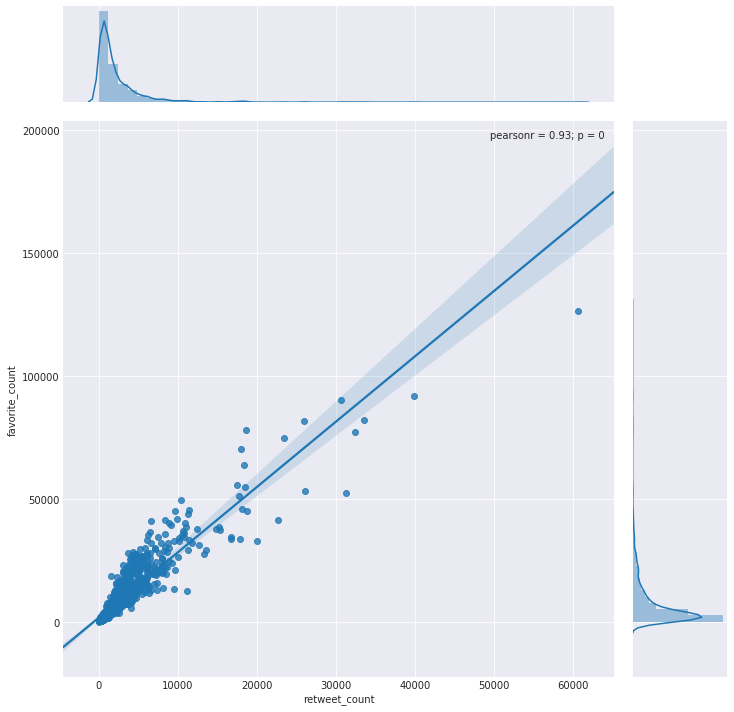

In [87]:
#Visualization for relationship between retweet count favorite count
sns.set_style('darkgrid')
sns.jointplot(x='retweet_count',y='favorite_count',kind='reg',data=df2,size=10)

In [88]:
#forming dataframe d1 from describe method output of df3
d1=pd.DataFrame(df3.describe())

In [89]:
#dropping first three rows
d1.drop(['count','mean','std'],axis=0,inplace=True)

In [90]:
d1

,rating_numerator,rating_denominator,retweet_count,favorite_count
min,5.0,10.0,96.0,660.0
25%,10.0,10.0,645.0,2233.0
50%,11.0,10.0,1180.0,3194.0
75%,12.0,10.0,2302.5,7532.5
max,27.0,10.0,16683.0,37743.0


Text(0.5,1,'Pupper Rating Distribution')

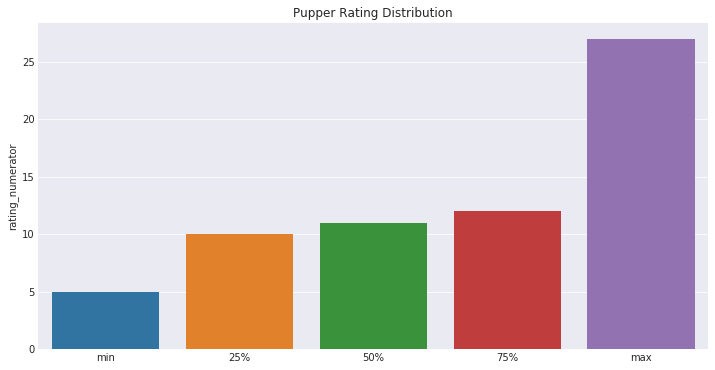

In [91]:
#Visualization of rating for Pupper stage
plt.figure(figsize=(12,6))
sns.barplot(x=d1.index,y='rating_numerator',data=d1)
plt.title('Pupper Rating Distribution')

In [92]:
#forming dataframe for Doggo stage to visualize ratings
d2=pd.DataFrame(df4.describe())
d2.drop(['count','mean','std'],axis=0,inplace=True)

Text(0.5,1,'Doggo Rating Distribution')

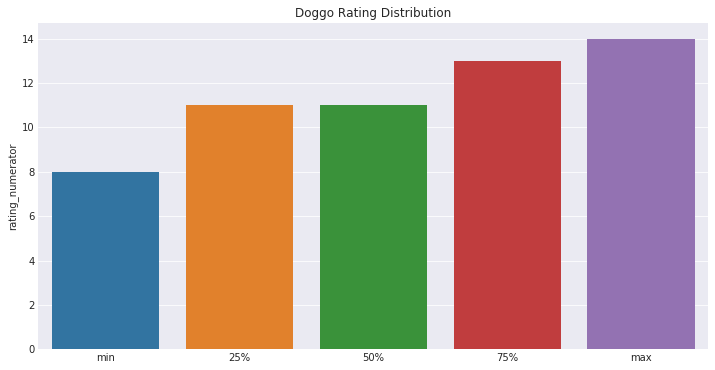

In [93]:
#Visualization of rating for Doggo stage
plt.figure(figsize=(12,6))
sns.barplot(x=d2.index,y='rating_numerator',data=d2)
plt.title('Doggo Rating Distribution')

In [94]:
#forming dataframe for floofer stage to visualize ratings
d3=pd.DataFrame(df5.describe())
d3.drop(['count','mean','std'],axis=0,inplace=True)

Text(0.5,1,'Floofer Rating Distribution')

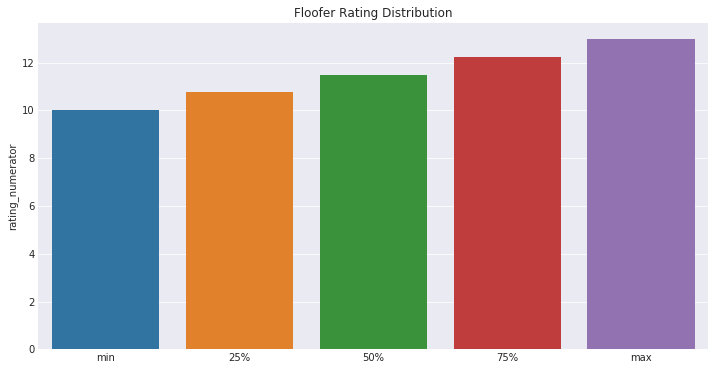

In [95]:
#Visualization of rating for Floofer stage
plt.figure(figsize=(12,6))
sns.barplot(x=d3.index,y='rating_numerator',data=d3)
plt.title('Floofer Rating Distribution')

In [96]:
#forming dataframe for puppo stage to visualize ratings
d4=pd.DataFrame(df6.describe())
d4.drop(['count','mean','std'],axis=0,inplace=True)

Text(0.5,1,'Puppo Rating Distribution')

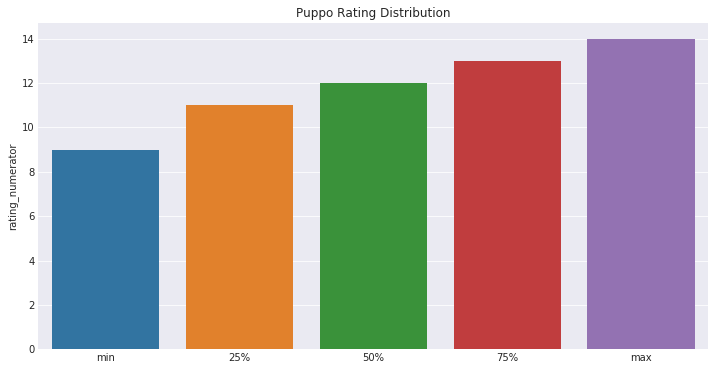

In [97]:
#Visualization of rating for Puppo stage
plt.figure(figsize=(12,6))
sns.barplot(x=d4.index,y='rating_numerator',data=d4)
plt.title('Puppo Rating Distribution')

# Footnotes

- https://media.readthedocs.org/pdf/tweepy/v3.5.0/tweepy.pdf

- http://adilmoujahid.com/posts/2014/07/twitter-analytics/

- https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

- https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

- https://www.geeksforgeeks.org/python-pandas-isnull-and-notnull/

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html